# Random Forest x IRIS 

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
import time

### Importez le dataset IRIS 

In [71]:
X, y = load_iris(return_X_y=True)
type(X)

numpy.ndarray

### Faites un DataFrame 

In [72]:
iris = load_iris()
df1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


### Définissez les variables features et la target & effectuez un split 

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
X_train, X_test, y_train, y_test

(array([[7.4, 2.8, 6.1, 1.9],
        [7.7, 2.8, 6.7, 2. ],
        [5.5, 2.4, 3.7, 1. ],
        [6.1, 2.8, 4. , 1.3],
        [5.5, 2.5, 4. , 1.3],
        [6.3, 3.3, 6. , 2.5],
        [4.6, 3.4, 1.4, 0.3],
        [6.3, 2.7, 4.9, 1.8],
        [4.8, 3.1, 1.6, 0.2],
        [6.2, 2.8, 4.8, 1.8],
        [5.1, 3.8, 1.9, 0.4],
        [6.4, 2.7, 5.3, 1.9],
        [5. , 2. , 3.5, 1. ],
        [5.5, 4.2, 1.4, 0.2],
        [5.2, 4.1, 1.5, 0.1],
        [5.8, 2.7, 3.9, 1.2],
        [7.2, 3. , 5.8, 1.6],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 4.4, 1.5, 0.4],
        [5.2, 2.7, 3.9, 1.4],
        [7. , 3.2, 4.7, 1.4],
        [6.9, 3.1, 4.9, 1.5],
        [5.3, 3.7, 1.5, 0.2],
        [5.6, 2.9, 3.6, 1.3],
        [6.7, 3. , 5.2, 2.3],
        [4.9, 3. , 1.4, 0.2],
        [6.8, 3.2, 5.9, 2.3],
        [6.3, 2.3, 4.4, 1.3],
        [6.9, 3.2, 5.7, 2.3],
        [5. , 3.6, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.2],
        [6.7, 3.1, 4.7, 1.5],
        [4.9, 3.1, 1.5, 0.1],
        [6

### Entrainez le classifieur 

In [74]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

### Affichez l'accuracy de votre classifieur

In [75]:
y_pred = rfc.predict(X_test)
r2_score(y_test, y_pred)

0.839831401475237

### Analysez votre classifieur, que voyez vous ? 

Haute précision (83%) dans la prédiction du test

### Affichez les features importantes

In [76]:
rfc.feature_importances_

array([0.1005629 , 0.02744589, 0.46567688, 0.40631433])

Les features importantes sont petal_length et petal_width

### Affichez graphiquement les features importantes  

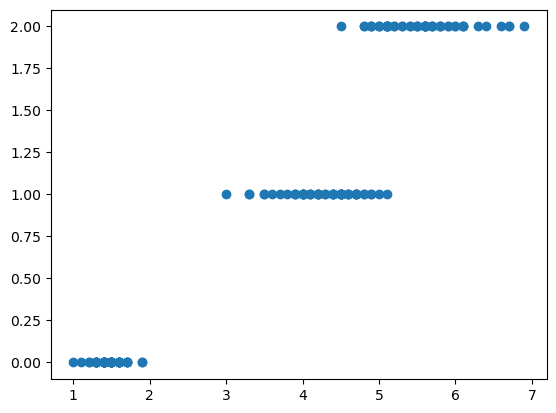

In [77]:
fig, ax = plt.subplots()
ax.scatter(X[:,2], y)
plt.show()

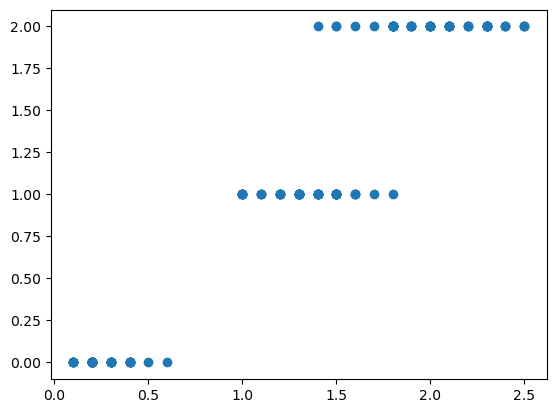

In [78]:
fig, ax = plt.subplots()
ax.scatter(X[:,3], y)
plt.show()

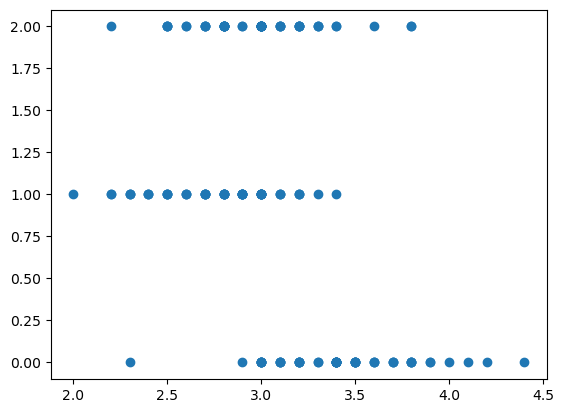

In [80]:
fig, ax = plt.subplots()
ax.scatter(X[:,1], y)
plt.show()

### Entrainez votre classifieur avec moins de features

In [79]:
# Test en se séparant de la dernière feature
X_train2, X_test2, y_train2, y_test2 = train_test_split(X[:,0:3], y, stratify=y, random_state=42)
rfc2 = RandomForestClassifier(random_state=0)
rfc2.fit(X_train2, y_train2)
y_pred2 = rfc2.predict(X_test2)
print(r2_score(y_test2, y_pred2))
print(rfc2.feature_importances_)

0.7997892518440464
[0.29830642 0.18921586 0.51247772]


### Que constatez vous ? 

La précision de la prédiction est moins bonne et les 3 autres features ont + d'importances avec ce nouveau classifieur.